<a href="https://colab.research.google.com/github/Baxi-codes/QMLHEP-tasks/blob/main/QML_HEP_GSoC_Task_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QML-HEP GSoC 2023 Task-I  Quantum Computing Part

This is the jupyter notebook containing task I for QMLHEP GSOC 2023

### Implementing the simple quantum operation with Cirq

In [ ]:
!pip install cirq

from IPython.display import clear_output
clear_output()

In [ ]:
import cirq
import numpy as np

In [ ]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(5)

for qubit in qubits:
    circuit.append(cirq.H(qubit))

circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.CNOT(qubits[3], qubits[4]))

circuit.append(cirq.SWAP(qubits[0], qubits[4]))
circuit.append(cirq.rx(np.pi / 2).on(qubits[2]))

print(circuit)

0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───


### Implementing the second circuit with qiskit

In [ ]:
!pip3 install qiskit
clear_output()
import qiskit

In [ ]:
qubits = qiskit.QuantumRegister(6,'qubit')
classical_reg = qiskit.ClassicalRegister(2,'classical_reg')
circuit = qiskit.QuantumCircuit(qubits,classical_reg)

circuit.h(qubits[0])
circuit.rx(np.pi / 3, qubits[1])
circuit.h(qubits[2])
circuit.h(qubits[3])
circuit.barrier()

print(circuit)

                    ┌───┐    ░ 
        qubit_0: ───┤ H ├────░─
                 ┌──┴───┴──┐ ░ 
        qubit_1: ┤ Rx(π/3) ├─░─
                 └──┬───┬──┘ ░ 
        qubit_2: ───┤ H ├────░─
                    ├───┤    ░ 
        qubit_3: ───┤ H ├────░─
                    └───┘    ░ 
        qubit_4: ────────────░─
                             ░ 
        qubit_5: ────────────░─
                             ░ 
classical_reg: 2/══════════════
                               


In [ ]:
circuit.h(qubits[4])
circuit.cswap(qubits[4],qubits[0],qubits[1])
circuit.h(qubits[4])
circuit.measure(qubits[4],classical_reg[0])

circuit.barrier()

circuit.h(qubits[5])
circuit.cswap(qubits[5],qubits[2],qubits[3])
circuit.h(qubits[5])
circuit.measure(qubits[5],classical_reg[1])

circuit.draw()

┌───┐    ░                  ░                 
        qubit_0: ───┤ H ├────░───────X──────────░─────────────────
                 ┌──┴───┴──┐ ░       │          ░                 
        qubit_1: ┤ Rx(π/3) ├─░───────X──────────░─────────────────
                 └──┬───┬──┘ ░       │          ░                 
        qubit_2: ───┤ H ├────░───────┼──────────░───────X─────────
                    ├───┤    ░       │          ░       │         
        qubit_3: ───┤ H ├────░───────┼──────────░───────X─────────
                    └───┘    ░ ┌───┐ │ ┌───┐┌─┐ ░       │         
        qubit_4: ────────────░─┤ H ├─■─┤ H ├┤M├─░───────┼─────────
                             ░ └───┘   └───┘└╥┘ ░ ┌───┐ │ ┌───┐┌─┐
        qubit_5: ────────────░───────────────╫──░─┤ H ├─■─┤ H ├┤M├
                             ░               ║  ░ └───┘   └───┘└╥┘
classical_reg: 2/════════════════════════════╩══════════════════╩═
                                             0                  1

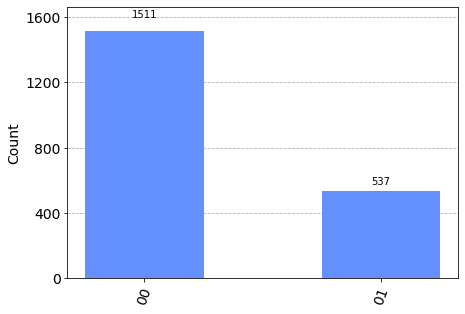

In [ ]:
simulator = qiskit.Aer.get_backend('aer_simulator')
circ = qiskit.transpile(circuit, simulator)

shots=2048

result = simulator.run(circ,shots=shots).result()
counts = result.get_counts(circ)
qiskit.visualization.plot_histogram(counts)

In [ ]:
b1=0
b2=0

if '01' in counts:
    b1 += counts['01']
if '10' in counts:
    b2 += counts['10']
if '11' in counts:
    b1 += counts['11']
    b2 += counts['11']

s1 = 1-(2/shots)*(b1)
s2 = 1-(2/shots)*(b2)

print(f"Squared Inner Product of qubits 1 and 2 is {s1}")
print(f"Squared Inner Product of qubits 3 and 4 is {s2}")

Squared Inner Product of qubits 1 and 2 is 0.4755859375
Squared Inner Product of qubits 3 and 4 is 1.0
